### Book Link

https://www.ebooksread.com/authors-eng/george-o-george-oliver-smith/operation-interstellar-904.shtml

### Importing necessary libraries

In [54]:
import nltk
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import random as rnd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import defaultdict,Counter


### Downloading packages

In [30]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\issar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\issar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\issar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Function for data preprocessing using regular expressions

In [31]:
def text_preprocessing(raw):
    # lower case
    raw = raw.lower()
    # remove numbers
    raw = re.sub(r'\d+', '', raw)
    # remove punctuation
    raw = re.sub(r'[^\w\s]', '', raw)
    # white space removal
    raw = raw.strip()
    #removing any non alphanumeric characters
    raw = re.sub('\W', ' ', raw)  
    #removing extra white spaces
    raw = re.sub('\s+', ' ', raw) 
    #removing chapter numbers and running sections
    raw = re.sub('chapter \w*', '', raw)   
    return (raw)

## Importing the text  

In [34]:
novel= open("novel.txt")
raw_text=novel.read()
T=raw_text

In [35]:
T

' OPERATION INTERSTELLAR ***\n\n\n\n\nProduced by Greg Weeks, Mary Meehan and the Online\nDistributed Proofreading Team at http://www.pgdp.net\n\n\n\n\n\n\n\n\n\n                        OPERATION INTERSTELLAR\n\n                                 _By_\n                            George O. Smith\n\n                         CENTURY PUBLICATIONS\n                                Chicago\n\n                  Published by Century Publications,\n                   139 N. Clark St., Chicago 2, Ill.\n               _Printed in the United States of America_\n\n     Characters and situations in this book are fictional and any\n    similarity to actual persons or places is purely coincidental.\n\n        Permission to use some of the refrains from the ballad:\n\n                     THE CYCLOTRONIST\'S NIGHTMARE\n\n                           by Arthur Roberts\n                                  of\n                     The State University of Iowa\n          was graciously granted, and is hereby ack

### Applying the preprocessing function

In [36]:
T=text_preprocessing(T)
print(T)

operation interstellar produced by greg weeks mary meehan and the online distributed proofreading team at httpwwwpgdpnet operation interstellar _by_ george o smith century publications chicago published by century publications n clark st chicago ill _printed in the united states of america_ characters and situations in this book are fictional and any similarity to actual persons or places is purely coincidental permission to use some of the refrains from the ballad the cyclotronists nightmare by arthur roberts of the state university of iowa was graciously granted and is hereby acknowledged with sincere appreciation cover by malcolm smith _copyright century publications_ transcribers note extensive research did not uncover any evidence that the us copyright on this publication was renewed  grayson walked the city street slowly he was sauntering towards the spaceport but he was in no hurry he had allowed himself plenty of time to breathe the fresh spring air to listen to the myriad of s

In [37]:
def stopwords_text(text):
    stop_words = set(nltk.corpus.stopwords.words('english'))

    x = 65
    y = 97
    # Adding all the uppercase and lowecase letters to stopwords
    
    for i in range(26):
        stop_words.add(chr(x))
        stop_words.add(chr(y))
        x += 1
        y += 1
    tokens = word_tokenize(text)
    result = [i for i in tokens if not i in stop_words]
    return result

## Tokenizing the text 

In [38]:
tokenized_T=word_tokenize(T)
tokenized_T

['operation',
 'interstellar',
 'produced',
 'by',
 'greg',
 'weeks',
 'mary',
 'meehan',
 'and',
 'the',
 'online',
 'distributed',
 'proofreading',
 'team',
 'at',
 'httpwwwpgdpnet',
 'operation',
 'interstellar',
 '_by_',
 'george',
 'o',
 'smith',
 'century',
 'publications',
 'chicago',
 'published',
 'by',
 'century',
 'publications',
 'n',
 'clark',
 'st',
 'chicago',
 'ill',
 '_printed',
 'in',
 'the',
 'united',
 'states',
 'of',
 'america_',
 'characters',
 'and',
 'situations',
 'in',
 'this',
 'book',
 'are',
 'fictional',
 'and',
 'any',
 'similarity',
 'to',
 'actual',
 'persons',
 'or',
 'places',
 'is',
 'purely',
 'coincidental',
 'permission',
 'to',
 'use',
 'some',
 'of',
 'the',
 'refrains',
 'from',
 'the',
 'ballad',
 'the',
 'cyclotronists',
 'nightmare',
 'by',
 'arthur',
 'roberts',
 'of',
 'the',
 'state',
 'university',
 'of',
 'iowa',
 'was',
 'graciously',
 'granted',
 'and',
 'is',
 'hereby',
 'acknowledged',
 'with',
 'sincere',
 'appreciation',
 'cover'

## Text tokenized and stopwords removed

In [39]:
cleaned_text=stopwords_text(T)
cleaned_text

['operation',
 'interstellar',
 'produced',
 'greg',
 'weeks',
 'mary',
 'meehan',
 'online',
 'distributed',
 'proofreading',
 'team',
 'httpwwwpgdpnet',
 'operation',
 'interstellar',
 '_by_',
 'george',
 'smith',
 'century',
 'publications',
 'chicago',
 'published',
 'century',
 'publications',
 'clark',
 'st',
 'chicago',
 'ill',
 '_printed',
 'united',
 'states',
 'america_',
 'characters',
 'situations',
 'book',
 'fictional',
 'similarity',
 'actual',
 'persons',
 'places',
 'purely',
 'coincidental',
 'permission',
 'use',
 'refrains',
 'ballad',
 'cyclotronists',
 'nightmare',
 'arthur',
 'roberts',
 'state',
 'university',
 'iowa',
 'graciously',
 'granted',
 'hereby',
 'acknowledged',
 'sincere',
 'appreciation',
 'cover',
 'malcolm',
 'smith',
 '_copyright',
 'century',
 'publications_',
 'transcribers',
 'note',
 'extensive',
 'research',
 'uncover',
 'evidence',
 'us',
 'copyright',
 'publication',
 'renewed',
 'grayson',
 'walked',
 'city',
 'street',
 'slowly',
 'saunt

## Function to calculate frequency of the tokens

In [40]:
def freq(tokens):
# frequency of tokens
    freq = {}
    for t in tokens:
        if t in freq:
            freq[t]+=1
        else:
            freq[t]=1
    return freq

In [41]:
mapped_freq=freq(cleaned_text)

## Tokens mapped to their frequencies 

In [42]:
mapped_freq

{'operation': 5,
 'interstellar': 20,
 'produced': 2,
 'greg': 1,
 'weeks': 12,
 'mary': 1,
 'meehan': 1,
 'online': 1,
 'distributed': 2,
 'proofreading': 1,
 'team': 1,
 'httpwwwpgdpnet': 1,
 '_by_': 1,
 'george': 1,
 'smith': 2,
 'century': 4,
 'publications': 2,
 'chicago': 2,
 'published': 1,
 'clark': 1,
 'st': 1,
 'ill': 42,
 '_printed': 1,
 'united': 2,
 'states': 3,
 'america_': 1,
 'characters': 5,
 'situations': 1,
 'book': 3,
 'fictional': 1,
 'similarity': 1,
 'actual': 2,
 'persons': 1,
 'places': 3,
 'purely': 1,
 'coincidental': 1,
 'permission': 2,
 'use': 20,
 'refrains': 1,
 'ballad': 2,
 'cyclotronists': 2,
 'nightmare': 2,
 'arthur': 1,
 'roberts': 1,
 'state': 14,
 'university': 1,
 'iowa': 1,
 'graciously': 3,
 'granted': 1,
 'hereby': 1,
 'acknowledged': 1,
 'sincere': 1,
 'appreciation': 1,
 'cover': 3,
 'malcolm': 1,
 '_copyright': 1,
 'publications_': 1,
 'transcribers': 1,
 'note': 3,
 'extensive': 2,
 'research': 7,
 'uncover': 1,
 'evidence': 39,
 'us': 16

## Function to make the frequency graph

In [43]:
def freq_graph(tokens):
#frequency graph
    FreqDist(tokens)
    all_fdist = FreqDist(tokens).most_common(60)

    all_fdist = pd.Series(dict(all_fdist))

    fig, ax = plt.subplots(figsize=(10,10))

    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=90)

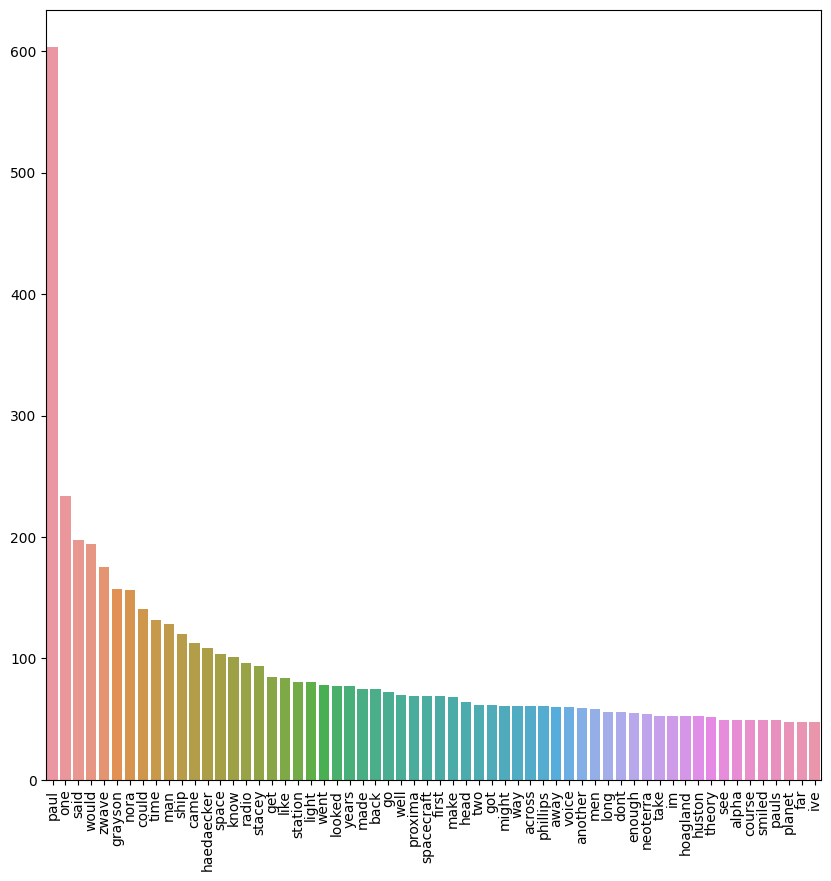

In [44]:
freq_graph(cleaned_text)

## Creating the WordCloud

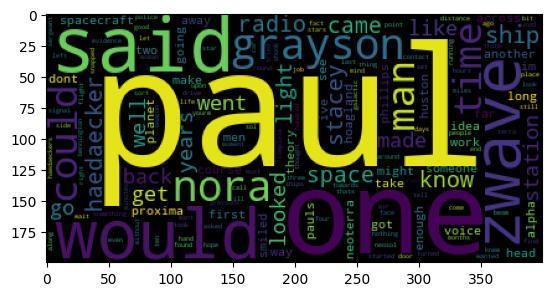

<Figure size 2000x3500 with 0 Axes>

In [45]:
cloud=WordCloud()
wordCloud=cloud.generate_from_frequencies(mapped_freq)
plt.imshow(wordCloud)
plt.figure(figsize=(20,35))
plt.show()

## Pos Tagging the cleaned text

In [46]:
posTagged=nltk.pos_tag(cleaned_text)

In [47]:
posTagged

[('operation', 'NN'),
 ('interstellar', 'NN'),
 ('produced', 'VBD'),
 ('greg', 'JJ'),
 ('weeks', 'NNS'),
 ('mary', 'JJ'),
 ('meehan', 'NNS'),
 ('online', 'VBP'),
 ('distributed', 'VBN'),
 ('proofreading', 'VBG'),
 ('team', 'NN'),
 ('httpwwwpgdpnet', 'NN'),
 ('operation', 'NN'),
 ('interstellar', 'JJ'),
 ('_by_', 'NNP'),
 ('george', 'NN'),
 ('smith', 'JJ'),
 ('century', 'NN'),
 ('publications', 'NNS'),
 ('chicago', 'VBP'),
 ('published', 'JJ'),
 ('century', 'NN'),
 ('publications', 'NNS'),
 ('clark', 'VBP'),
 ('st', 'JJ'),
 ('chicago', 'NN'),
 ('ill', 'NN'),
 ('_printed', 'VBD'),
 ('united', 'JJ'),
 ('states', 'NNS'),
 ('america_', 'VBP'),
 ('characters', 'NNS'),
 ('situations', 'NNS'),
 ('book', 'NN'),
 ('fictional', 'JJ'),
 ('similarity', 'NN'),
 ('actual', 'JJ'),
 ('persons', 'NNS'),
 ('places', 'NNS'),
 ('purely', 'RB'),
 ('coincidental', 'JJ'),
 ('permission', 'NN'),
 ('use', 'NN'),
 ('refrains', 'VBZ'),
 ('ballad', 'JJ'),
 ('cyclotronists', 'NNS'),
 ('nightmare', 'VBP'),
 ('arthur

## Visualising the POS TAGS

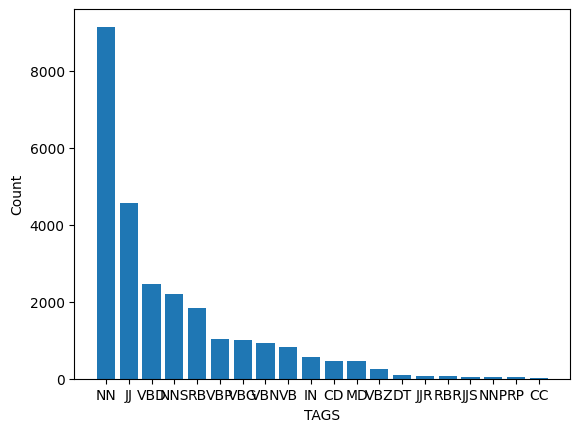

In [48]:
dict1 = {}
for key, value in posTagged:
    if(value not in dict1):
        dict1[value] = 1
    else:
        dict1[value] += 1

sorted_tags = dict(sorted(dict1.items(), key=lambda item:item[1], reverse=True))


N = 20
sorted_tags=dict(list(sorted_tags.items())[0:N])

plt.bar(sorted_tags.keys(), sorted_tags.values())
plt.xlabel('TAGS')
plt.ylabel('Count')
plt.show()

### Writing a function to find out the largest chapter and seperate all chapters

In [76]:

def chapter_seperate(raw_text):
    
    #splitting the chapters from the raw text
    chapters = re.split(r'CHAPTER \d+', raw_text)
    
    
    #creating an array for chapter lengths
    chapter_lengths=[len(i) for i in chapters]
    
    #taking out the largest chapter text
    largest_chapter=chapters[pd.Series(chapter_lengths).idxmax()]
    return largest_chapter,chapters


In [77]:
largest_chapter,chapters=chapter_seperate(raw_text)
largest_chapter

'\n\n\nLike most human beings, Paul could comprehend the actions of someone\nof his own type. But he could not understand the mental machinations\nof people who had other motives and other interests in life. Nor could\nhe seem to make other people understand that his continued interest in\nthe Z-wave was only just and sensible. After all, he had never had an\nopportunity to try it.\n\nTo Paul it was just that simple. Just let him try it. He had so much\nfaith in it that he could not foresee his next reaction if failure\ncame. Paul did not consider failure as a possibility, but if he did\nfail, he would automatically begin insisting upon a chance to continue,\ninsisting that something had gone awry, or that there were factors that\nmust be studied.\n\nThis sort of attitude was acceptable to Paul, yet he could not\ncomprehend the contemplated action of the political factions he was\ninvolved with.\n\nFor instance, one faction was going to falsify evidence in order to\nswing an election. 

### Processing the largest chapter text

In [74]:
largest_chapter_text=text_preprocessing(largest_chapter)
print(largest_chapter_text)

like most human beings paul could comprehend the actions of someone of his own type but he could not understand the mental machinations of people who had other motives and other interests in life nor could he seem to make other people understand that his continued interest in the zwave was only just and sensible after all he had never had an opportunity to try it to paul it was just that simple just let him try it he had so much faith in it that he could not foresee his next reaction if failure came paul did not consider failure as a possibility but if he did fail he would automatically begin insisting upon a chance to continue insisting that something had gone awry or that there were factors that must be studied this sort of attitude was acceptable to paul yet he could not comprehend the contemplated action of the political factions he was involved with for instance one faction was going to falsify evidence in order to swing an election this seemed dishonest to paul he wondered just h

## Writing a function to calculate the bigram probabilities from a given text

In [52]:
def bigram_probability(text):
    words = text.split()

    # Counting the occurrences of bigrams
    bigrams = [(words[i], words[i + 1]) for i in range(len(words) - 1)]
    bigram_counts = Counter(bigrams)

    # Calculating the probabilities
    
    #total number of unique bigrams
    total_bigrams = len(bigram_counts)
    bigram_probabilities = {bigram: count / total_bigrams for bigram, count in bigram_counts.items()}
    bigram_probabilities = dict(sorted(bigram_probabilities.items(),key=lambda item:item[1],reverse=True))

    # Printing the bigram probabilities
    for bigram, probability in sorted(bigram_probabilities.items(),key=lambda item:item[1],reverse=True):
        print(f"Bigram: {bigram}, Probability: {probability:.4f}")


## Calculating the bigram probabilities of the largest chapter 

In [53]:
bigram_probability(largest_chapter_text)

Bigram: ('of', 'the'), Probability: 0.0103
Bigram: ('it', 'was'), Probability: 0.0044
Bigram: ('on', 'the'), Probability: 0.0041
Bigram: ('and', 'the'), Probability: 0.0037
Bigram: ('as', 'the'), Probability: 0.0034
Bigram: ('with', 'the'), Probability: 0.0031
Bigram: ('would', 'be'), Probability: 0.0031
Bigram: ('in', 'the'), Probability: 0.0028
Bigram: ('the', 'other'), Probability: 0.0028
Bigram: ('at', 'the'), Probability: 0.0028
Bigram: ('was', 'a'), Probability: 0.0028
Bigram: ('the', 'zwave'), Probability: 0.0025
Bigram: ('had', 'been'), Probability: 0.0025
Bigram: ('and', 'then'), Probability: 0.0025
Bigram: ('from', 'the'), Probability: 0.0025
Bigram: ('to', 'the'), Probability: 0.0025
Bigram: ('the', 'door'), Probability: 0.0025
Bigram: ('he', 'could'), Probability: 0.0022
Bigram: ('he', 'had'), Probability: 0.0022
Bigram: ('did', 'not'), Probability: 0.0022
Bigram: ('stacey', 'and'), Probability: 0.0022
Bigram: ('across', 'the'), Probability: 0.0022
Bigram: ('and', 'morrow')

### Taking out some other random chapter 

In [80]:
random_chapter=rnd.choice(chapters)
random_chapter

'\n\n\nPaul Grayson walked the city street slowly. He was sauntering towards\nthe spaceport, but he was in no hurry. He had allowed himself plenty of\ntime to breathe the fresh spring air, to listen to the myriad of sounds\nmade by his fellow men, and to revel in the grand freedom that being\nout in the open gave him. Soon enough he would be breathing canned air,\npungent with the odor of compressor oil and the tang of the greenery\nused to replenish the oxygen, unable to walk freely more than a few\ndozen steps, and unable to see what lies beyond his viewports.\n\nOccasionally his eyes looked along the low southern sky towards Alpha\nCentauri. Proxima, of course, could not be resolved by the naked eye,\nmuch less the stinking little overheated mote that rotated about\nProxima. Obviously unfit for human life and patently incapable of\nspawning life of its own, it was Paul Grayson\'s destination, and would\nbe his home for a few days or a few weeks depending entirely upon\nwhether thing

In [82]:
random_chapter=text_preprocessing(random_chapter)
random_chapter

'paul grayson walked the city street slowly he was sauntering towards the spaceport but he was in no hurry he had allowed himself plenty of time to breathe the fresh spring air to listen to the myriad of sounds made by his fellow men and to revel in the grand freedom that being out in the open gave him soon enough he would be breathing canned air pungent with the odor of compressor oil and the tang of the greenery used to replenish the oxygen unable to walk freely more than a few dozen steps and unable to see what lies beyond his viewports occasionally his eyes looked along the low southern sky towards alpha centauri proxima of course could not be resolved by the naked eye much less the stinking little overheated mote that rotated about proxima obviously unfit for human life and patently incapable of spawning life of its own it was paul graysons destination and would be his home for a few days or a few weeks depending entirely upon whether things went good or bad only during the last f